In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### Importing Data

In [2]:
df = pd.read_excel(r'C:\Users\Dell\Financial Transaction prediction\EURUSD_202102031200_20210205.xlsx',engine = 'openpyxl') 

In [3]:
df.head()

,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>
0,2021.01.11,08:54:00,1.21893,1.21897,1.21887,1.21897,15
1,2021.01.11,08:55:00,1.21897,1.21897,1.21889,1.21890,17
2,2021.01.11,08:56:00,1.21890,1.21900,1.21883,1.21900,28
3,2021.01.11,08:57:00,1.21900,1.21904,1.21893,1.21893,31
4,2021.01.11,08:58:00,1.21893,1.21898,1.21893,1.21898,23


In [4]:
df.isnull().sum() #no missing values

<DATE>       0
<TIME>       0
<OPEN>       0
<HIGH>       0
<LOW>        0
<CLOSE>      0
<TICKVOL>    0
dtype: int64

In [5]:
df.shape

(27577, 7)

### Changing header for convinience

In [6]:
df.columns = df.columns.str.replace('[<,>]','')

D:\Anaconda\envs\basept3.7\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [7]:
df.columns

Index(['DATE', 'TIME', 'OPEN', 'HIGH', 'LOW', 'CLOSE', 'TICKVOL'], dtype='object')

In [8]:
columns_lower = []
for i in df.columns:
    i = i.lower()
    columns_lower.append(i)
print(columns_lower)

['date', 'time', 'open', 'high', 'low', 'close', 'tickvol']


In [9]:
df.columns = columns_lower

In [10]:
df.columns

Index(['date', 'time', 'open', 'high', 'low', 'close', 'tickvol'], dtype='object')

In [11]:
df.head()#Printing first five rows of the dataframe

,date,time,open,high,low,close,tickvol
0,2021.01.11,08:54:00,1.21893,1.21897,1.21887,1.21897,15
1,2021.01.11,08:55:00,1.21897,1.21897,1.21889,1.21890,17
2,2021.01.11,08:56:00,1.21890,1.21900,1.21883,1.21900,28
3,2021.01.11,08:57:00,1.21900,1.21904,1.21893,1.21893,31
4,2021.01.11,08:58:00,1.21893,1.21898,1.21893,1.21898,23


In [12]:
df = df.drop(['date','time'],axis = 1) #Dropping date and time

D:\Anaconda\envs\basept3.7\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


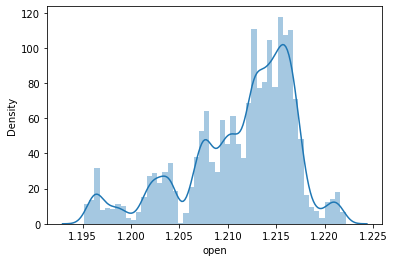

D:\Anaconda\envs\basept3.7\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


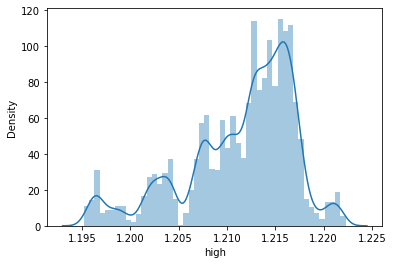

D:\Anaconda\envs\basept3.7\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


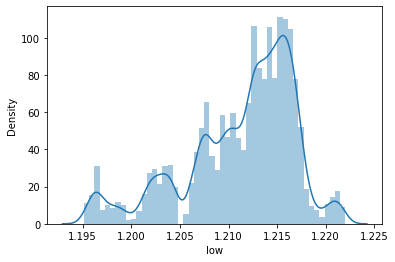

D:\Anaconda\envs\basept3.7\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


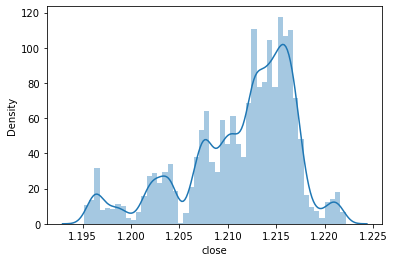

In [13]:
for i in df.columns:
    if i != 'tickvol':
        sns.distplot(df[i])
        plt.show()

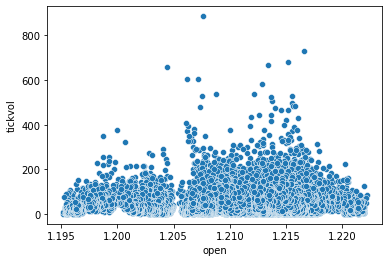

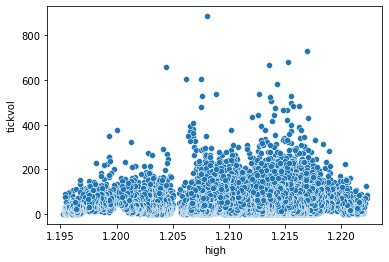

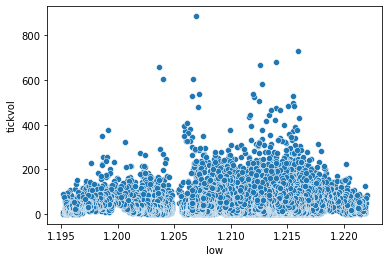

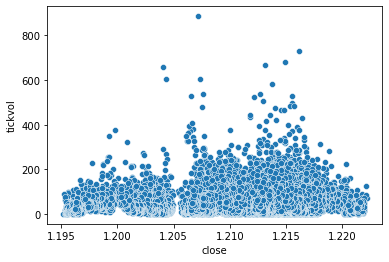

In [14]:
for i in df.columns:
    if i!='tickvol':
        sns.scatterplot(x = df[i],y = df['tickvol'])
        plt.show()

In [15]:
df_copy = df.copy()

### Correlation amoung predictors

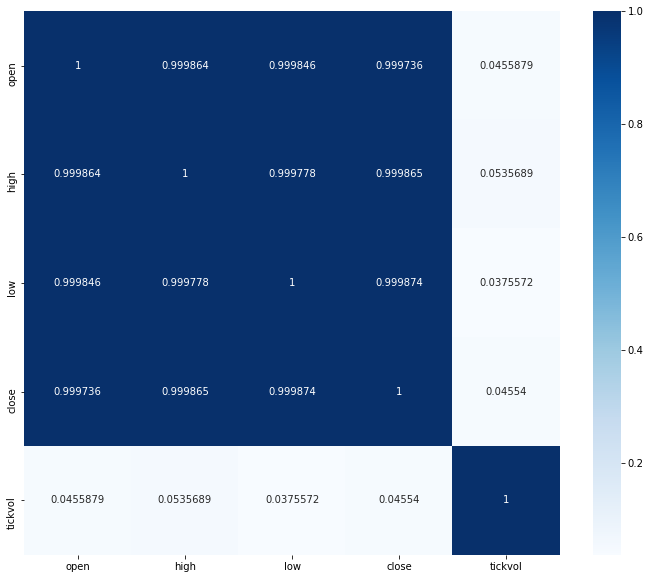

In [16]:
plt.figure(figsize = (12,10))
sns.heatmap(df.corr(),annot = True,cmap = 'Blues',fmt = 'g')
plt.show()

#### As can be seen from the heatmap above, the pearson's correlation amoung the predictors is very high (approximately 1). This violates the assumption of linear regression that the predictors must not have correlation. To reduce the problem of multicollinearity, we use Principal Component Analysis. This will reduce the correlation amoung the predictors and transform the data. We then can apply linear regression to it.

In [17]:
y = df['tickvol'].values
df = df.drop('tickvol',axis = 1)
x = df.values

### Splitting data into train and test set

In [18]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.25)

### Applying PCA

In [19]:
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_
print(explained_variance)

[1.28156438e-04 8.54412123e-09 7.03182480e-09 1.02795779e-09]


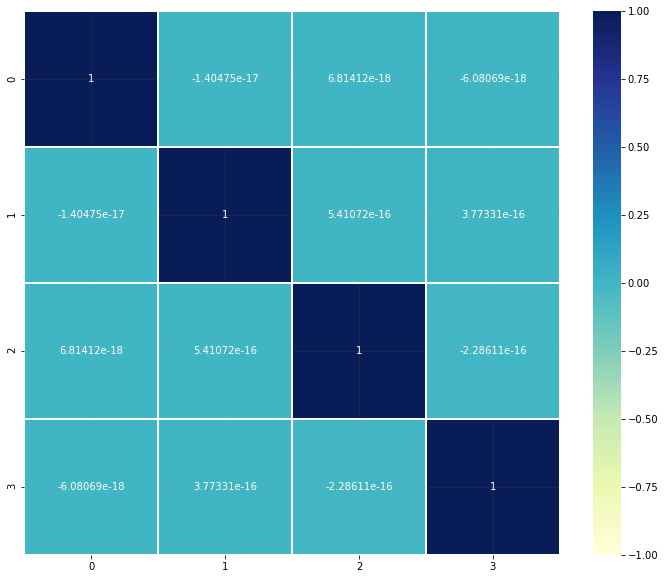

In [20]:
df_train_pca = pd.DataFrame(X_train)
corr = df_train_pca.corr()
plt.figure(figsize = (12,10))
sns.heatmap(corr, annot = True, vmin=-1, vmax=1, cmap="YlGnBu", linewidths=.5,fmt = 'g')
plt.grid(b=True, color='#f68c1f', alpha=0.1)
plt.show()

#### As we can see from the plot that PCA reduces the collinearity amoung the predictors.

In [21]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)

### Mean Squared Error

In [22]:
print('The mean squared error for the model is:',mean_squared_error(y_test,y_pred))

The mean squared error for the model is: 941.1819524719782


#### R-Square Value

In [23]:
print('The R-squared values is:',r2_score(y_test,y_pred))

The R-squared values is: 0.5643867803240525
